<a href="https://colab.research.google.com/github/Bkevz/Data-Analytics/blob/main/Salary_Estimation_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


Loading Dataset

In [3]:
dataset = pd.read_csv("salary.csv")

Summarize Dataset

In [8]:
print(dataset.describe())
print(dataset.shape)
print(dataset.head(5))

                age  education.num  capital.gain  hours.per.week
count  32561.000000   32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844       40.437456
std       13.640433       2.572720   7385.292085       12.347429
min       17.000000       1.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000       99.000000
(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping Salary Data Into Binary Values

In [11]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [12]:
 X = dataset.iloc[:, :-1].values
 X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [13]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

###Splitting Data into train and Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

###Feature Scalling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Finding the Best K-VAlue

Text(0, 0.5, 'Mean Error')

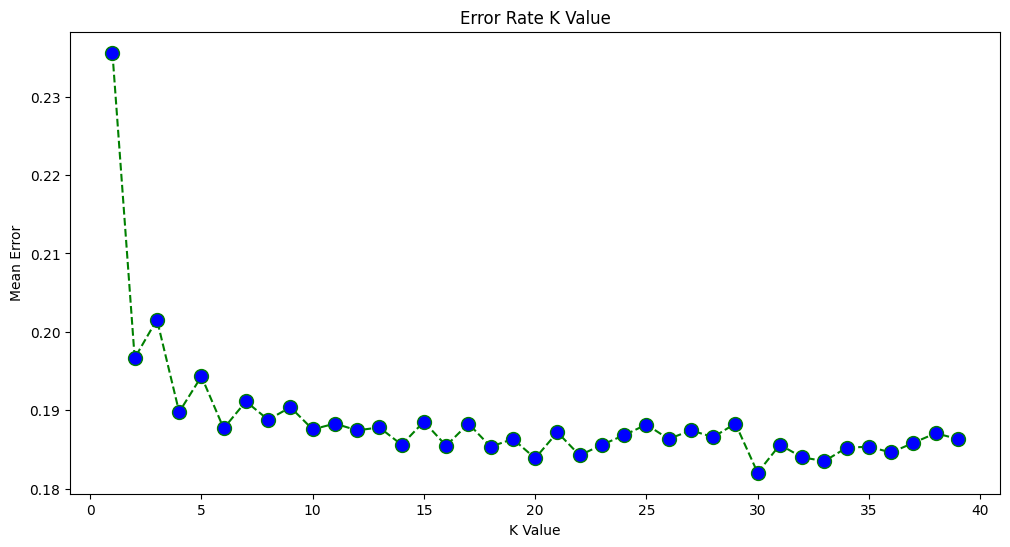

In [17]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

###Training

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30, metric = "minkowski", p =2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

###Predicting, whether new customer with Age & Salary will Buy or not

In [19]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 68
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 40
[0]
Customer might not got  Salary above 50K


###Prediction for the All Dataset

In [26]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Evaluating the Model - CONFUSION MATRIX

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5875  318]
 [1164  784]]
Accuracy of the Model: 81.79584817589976%
